In [13]:
import keras
from keras.layers import Conv2D, Flatten, Dense, ZeroPadding2D, Activation
from keras.layers import MaxPooling2D, Dropout, BatchNormalization, Reshape,GlobalAveragePooling2D
from keras.models import Sequential

def get_model():
    model = Sequential()
    model.add(Conv2D(50, kernel_size=(3, 3), padding='same', activation='relu',
                     strides=(2, 2),input_shape=(256, 256, 3)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D())  # only one maxpool layer

    model.add(Conv2D(100, kernel_size=(3, 3), padding='same',strides=(1, 1), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D())
    model.add(Dropout(0.3))

    model.add(Conv2D(100, kernel_size=(3, 3), padding='same',strides=(2, 2), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D())
    model.add(Dropout(0.3))

    model.add(Conv2D(200, kernel_size=(3, 3), padding='same', activation='relu',
                     strides=(1, 1)))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Conv2D(200, kernel_size=(3, 3), padding='same', activation='relu',
                     strides=(1, 1)))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))  
    #model.add(Flatten())
    model.add(GlobalAveragePooling2D())
    #model.add(Flatten())
    model.add(Dense(1200, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(1000, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Dense(800, activation='relu'))
    model.add(BatchNormalization())
    #model.add(Dropout(0.3))

    # Change the output layer for regression
    
    model.add(Dense(1,activation='linear'))  # Output a single continuous value

    return model

In [14]:
# Create the model
glucose_model = get_model()

# Compile the model for regression
glucose_model.compile(optimizer='adam', loss='mean_squared_error')

# Print the summary of the model architecture>
glucose_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 128, 128, 50)      1400      
                                                                 
 batch_normalization_8 (Bat  (None, 128, 128, 50)      200       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 64, 64, 50)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 64, 64, 100)       45100     
                                                                 
 batch_normalization_9 (Bat  (None, 64, 64, 100)       400       
 chNormalization)                                                
                                                      

In [15]:
import pandas as pd
import copy
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import os

def load_data(path):
    data = pd.read_csv(r"own_data_1.csv")
    new_data=data.astype('str')
    x = []
    y = []
    total = len(data)
    for i in range(total):
        im_p=new_data.iloc[i]['ID']+'.jpg'
        path1=os.path.join(path,im_p)
        im = Image.open(path1)
        im=im.resize((256,256))
        im = np.array(im).astype('float16')
        im = im / 255 - 0.5
        print(im.shape)
        x.append(im)
        y.append(data.iloc[i]['Glucose'])
    return x,y

In [16]:
path="D:\GlucoseDataCrop"
x,y=load_data(path)

(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)


In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [18]:
x_train1 = np.array(x_train)
y_train1 = np.array(y_train)
x_test1 = np.array(x_test)
y_test1 = np.array(y_test)

In [115]:
history = glucose_model.fit(x_train1, y_train1, batch_size=32, epochs=500, validation_data=(x_test1, y_test1),)

Epoch 1/500
2/2 [==============================] - 5s 682ms/step - loss: 8887.3848 - val_loss: 8421.5322
Epoch 2/500
2/2 [==============================] - 1s 398ms/step - loss: 8827.8311 - val_loss: 8413.5586
Epoch 3/500
2/2 [==============================] - 1s 424ms/step - loss: 8792.5078 - val_loss: 8398.3389
Epoch 4/500
2/2 [==============================] - 1s 392ms/step - loss: 8662.2061 - val_loss: 8384.8613
Epoch 5/500
2/2 [==============================] - 1s 386ms/step - loss: 8648.7041 - val_loss: 8364.5176
Epoch 6/500
2/2 [==============================] - 1s 379ms/step - loss: 8563.0479 - val_loss: 8332.3643
Epoch 7/500
2/2 [==============================] - 1s 404ms/step - loss: 8582.6621 - val_loss: 8321.6914
Epoch 8/500
2/2 [==============================] - 1s 390ms/step - loss: 8484.0215 - val_loss: 8351.8496
Epoch 9/500
2/2 [==============================] - 1s 400ms/step - loss: 8449.5635 - val_loss: 8327.5010
Epoch 10/500
2/2 [==============================] - 1s 

Epoch 156/500
2/2 [==============================] - 1s 380ms/step - loss: 83.7499 - val_loss: 359.9637
Epoch 157/500
2/2 [==============================] - 1s 377ms/step - loss: 68.6559 - val_loss: 328.1430
Epoch 158/500
2/2 [==============================] - 1s 391ms/step - loss: 50.8794 - val_loss: 239.2036
Epoch 159/500
2/2 [==============================] - 1s 381ms/step - loss: 53.2055 - val_loss: 255.5978
Epoch 160/500
2/2 [==============================] - 1s 379ms/step - loss: 58.4462 - val_loss: 287.0887
Epoch 161/500
2/2 [==============================] - 1s 385ms/step - loss: 27.5349 - val_loss: 284.7161
Epoch 162/500
2/2 [==============================] - 1s 372ms/step - loss: 45.6957 - val_loss: 229.0913
Epoch 163/500
2/2 [==============================] - 1s 373ms/step - loss: 43.4704 - val_loss: 205.4115
Epoch 164/500
2/2 [==============================] - 1s 376ms/step - loss: 39.7174 - val_loss: 212.7476
Epoch 165/500
2/2 [==============================] - 1s 374ms/st

Epoch 235/500
2/2 [==============================] - 1s 476ms/step - loss: 19.8685 - val_loss: 198.8035
Epoch 236/500
2/2 [==============================] - 1s 499ms/step - loss: 16.7416 - val_loss: 192.5714
Epoch 237/500
2/2 [==============================] - 1s 486ms/step - loss: 17.5957 - val_loss: 197.0372
Epoch 238/500
2/2 [==============================] - 1s 464ms/step - loss: 26.9573 - val_loss: 198.1992
Epoch 239/500
2/2 [==============================] - 1s 458ms/step - loss: 33.5338 - val_loss: 198.8253
Epoch 240/500
2/2 [==============================] - 1s 485ms/step - loss: 14.9492 - val_loss: 202.0747
Epoch 241/500
2/2 [==============================] - 1s 455ms/step - loss: 25.0680 - val_loss: 182.3228
Epoch 242/500
2/2 [==============================] - 1s 461ms/step - loss: 42.0651 - val_loss: 156.5367
Epoch 243/500
2/2 [==============================] - 1s 470ms/step - loss: 35.7734 - val_loss: 140.4400
Epoch 244/500
2/2 [==============================] - 1s 484ms/st

Epoch 314/500
2/2 [==============================] - 1s 430ms/step - loss: 10.3866 - val_loss: 141.8722
Epoch 315/500
2/2 [==============================] - 1s 417ms/step - loss: 20.2574 - val_loss: 137.3178
Epoch 316/500
2/2 [==============================] - 1s 470ms/step - loss: 8.2009 - val_loss: 142.1048
Epoch 317/500
2/2 [==============================] - 1s 507ms/step - loss: 18.7927 - val_loss: 146.0653
Epoch 318/500
2/2 [==============================] - 1s 439ms/step - loss: 36.0019 - val_loss: 148.2095
Epoch 319/500
2/2 [==============================] - 1s 422ms/step - loss: 35.7914 - val_loss: 161.1913
Epoch 320/500
2/2 [==============================] - 1s 430ms/step - loss: 46.7047 - val_loss: 169.8074
Epoch 321/500
2/2 [==============================] - 1s 417ms/step - loss: 40.1645 - val_loss: 158.3420
Epoch 322/500
2/2 [==============================] - 1s 504ms/step - loss: 17.5219 - val_loss: 150.0358
Epoch 323/500
2/2 [==============================] - 1s 458ms/ste

Epoch 393/500
2/2 [==============================] - 1s 436ms/step - loss: 111.1554 - val_loss: 161.2815
Epoch 394/500
2/2 [==============================] - 1s 421ms/step - loss: 35.7150 - val_loss: 211.6594
Epoch 395/500
2/2 [==============================] - 1s 389ms/step - loss: 47.1419 - val_loss: 217.6964
Epoch 396/500
2/2 [==============================] - 1s 493ms/step - loss: 50.4504 - val_loss: 200.6458
Epoch 397/500
2/2 [==============================] - 1s 446ms/step - loss: 23.3084 - val_loss: 218.2523
Epoch 398/500
2/2 [==============================] - 1s 439ms/step - loss: 26.8889 - val_loss: 239.4642
Epoch 399/500
2/2 [==============================] - 1s 413ms/step - loss: 43.0516 - val_loss: 247.8450
Epoch 400/500
2/2 [==============================] - 1s 454ms/step - loss: 29.9329 - val_loss: 261.0869
Epoch 401/500
2/2 [==============================] - 1s 444ms/step - loss: 40.9251 - val_loss: 295.7768
Epoch 402/500
2/2 [==============================] - 1s 408ms/s

Epoch 472/500
2/2 [==============================] - 1s 391ms/step - loss: 16.5957 - val_loss: 185.2225
Epoch 473/500
2/2 [==============================] - 1s 387ms/step - loss: 6.8421 - val_loss: 186.7872
Epoch 474/500
2/2 [==============================] - 1s 394ms/step - loss: 6.9199 - val_loss: 187.7775
Epoch 475/500
2/2 [==============================] - 1s 390ms/step - loss: 16.9871 - val_loss: 186.0934
Epoch 476/500
2/2 [==============================] - 1s 395ms/step - loss: 18.9655 - val_loss: 179.4290
Epoch 477/500
2/2 [==============================] - 1s 403ms/step - loss: 11.7440 - val_loss: 173.0462
Epoch 478/500
2/2 [==============================] - 1s 410ms/step - loss: 11.4224 - val_loss: 166.3376
Epoch 479/500
2/2 [==============================] - 1s 417ms/step - loss: 17.3200 - val_loss: 162.9593
Epoch 480/500
2/2 [==============================] - 1s 394ms/step - loss: 10.3806 - val_loss: 167.8329
Epoch 481/500
2/2 [==============================] - 1s 417ms/step

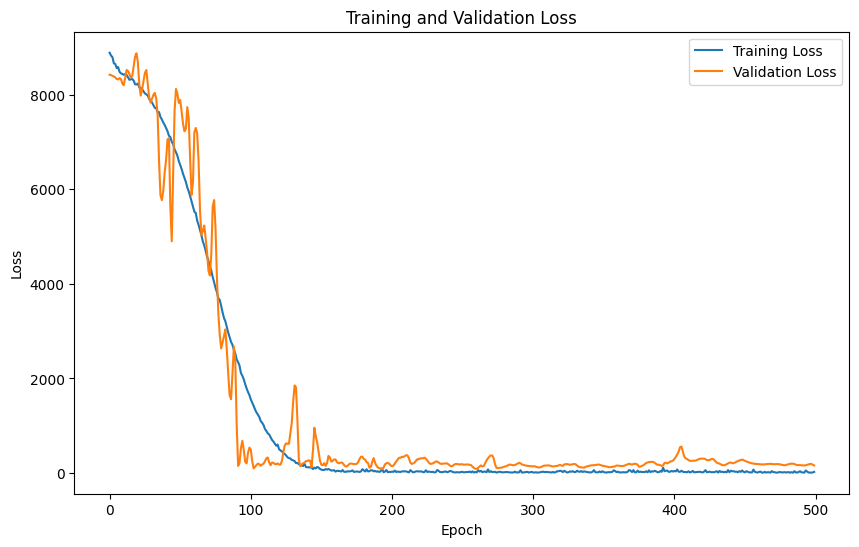

In [116]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [118]:
glucose_model.save("final.h5")

In [34]:
import keras
#model=keras.models.load_model('33.h5')
model=keras.models.load_model('final.h5')
model1=keras.models.load_model('22.h5')
model2=keras.models.load_model('33.h5')

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 50)      1400      
                                                                 
 batch_normalization (Batch  (None, 128, 128, 50)      200       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 50)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 100)       45100     
                                                                 
 batch_normalization_1 (Bat  (None, 64, 64, 100)       400       
 chNormalization)                                                
                                                        

In [60]:
from PIL import Image
import numpy as np
x1=[]
im = Image.open(r"D:\GlucoseDataCrop\535.jpg")
im=im.resize((256,256))
im = np.array(im).astype('float16')
im = im / 255 - 0.5
x1.append(im)
x1=np.array(x1)

In [61]:
y=model.predict(x1)
y1=model1.predict(x1)
y2=model2.predict(x1)

1/1 [==============================] - 0s 34ms/step


In [62]:
y

array([[74.00501]], dtype=float32)

In [63]:
y1

array([[95.16207]], dtype=float32)

In [64]:
y2

array([[80.67489]], dtype=float32)

In [65]:
avg=(y1+y2+y)/3
avg

array([[83.28066]], dtype=float32)